In [227]:
from math import sqrt, log, log10

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

%matplotlib inline  

In [2]:
def moving_average(a, n=3) :
    cum = np.cumsum(a, dtype=float)
    ret = cum + 0
    for i in range(len(ret)):
        if i < n:
            ret[i] = cum[i] / (i+1)
        else:
            ret[i] = (cum[i] - cum[i-n])/n
    return ret

In [3]:
def arrray_iterator(x, y):
    size = x.shape[0]
    i = 0
    while True:
        yield (x[i % size], y[i % size])
        i += 1

In [220]:
p = 1000
n = 100000


beta = np.random.random(p) #* 2 - 1

x = np.random.random(p * n).reshape((n, p,))
y = np.dot(x, beta) + np.random.normal(size=n) / 1000

In [225]:
def fit(x, y, l=0.001):
    epsilon = 1e-20
    moving_average_size = 20
    n = x.shape[0]
    p = x.shape[1]
    
    b_previous = np.zeros(p)
    lambdas = np.zeros(n)
    errors = np.zeros(n)
    trailing_errors = np.zeros(n)
    e_previous = np.inner(x[0], b_previous) - y[0]
    b = b_previous - x[0] * e_previous
    errors[0] = abs(e_previous) + epsilon
    # lambdas[0] = l
    for i in range(1, n):
        e = np.inner(x[i], b) - y[i]
        #l = (b - b_previous) / (e * x[i] - e_previous * x[i - 1])  # + 0.001 * x[i]
        #print(e, np.sum(np.abs(b - b_previous)), np.sum(np.abs(l)))
        # print(e - e_previous, np.sum(np.abs(l)))
        # print(e, e_previous, e - e_previous, l, b, b_previous)
        b_previous[:] = b
        e_previous = e
        b -= 0.005 * e * x[i]
        errors[i] = abs(e) + epsilon
        lambdas[i] = np.sum(np.abs(l))
    #print(e, b)
    #print(b - b_previous)
    return (n, b, lambdas, errors)

minimum achieved at : 95911
lambda :  0.5
error :  0.00168013057876
100000 th iteration
Trailing error :  [ 0.0020072]
Difference of coefficient : 0.0963500374685 [  8.57677932e-05   2.53838659e-05   1.46835254e-04   8.64445529e-05
   9.15506121e-05]
NB of non null coefficients :  993
Mean squared error : 0.00
Sum of log10 abs error :  -2.9252590087612234


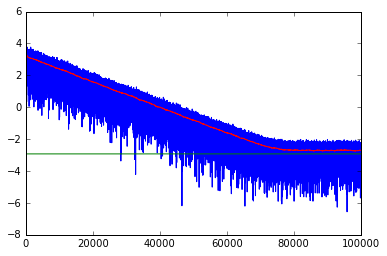

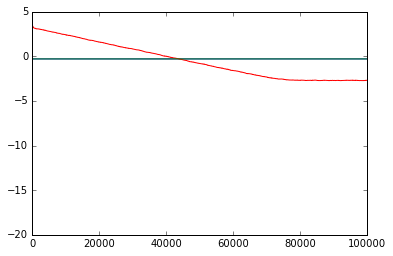

[ 0.10649039  0.58938467  0.77022482  0.98968807  0.07251663  0.09046852
  0.53143959  0.58393212  0.02144863  0.31162634  0.24572464  0.90839169
  0.8680711   0.62691317  0.5296699   0.29938963  0.13545195  0.45590576
  0.16094843  0.05791739  0.58245963  0.27457971  0.24119974  0.83748368
  0.61782237  0.89063893  0.18912509  0.10132697  0.03967499  0.22409561
  0.51004792  0.13631248  0.02319637  0.73004197  0.39792277  0.12741202
  0.17635     0.33971984  0.41983294  0.15980553  0.04526768  0.82254293
  0.73345768  0.17607633  0.51189842  0.32249672  0.2822702   0.91337186
  0.30529662  0.35941999  0.52267116  0.57370308  0.59702735  0.69774804
  0.76393194  0.67852842  0.84970072  0.51669682  0.52245952  0.6949794
  0.67142802  0.2510817   0.02006514  0.28497337  0.576639    0.09109565
  0.10411547  0.4555115   0.90611674  0.27787129  0.18483428  0.61507911
  0.01809721  0.26459034  0.38570682  0.90255263  0.80093244  0.58174957
  0.56216711  0.59706001  0.37196505  0.43175867  0.

In [226]:
i, b, l, errors = fit(x, y, l=0.5)
trailing_errors = moving_average(errors, 1000)

print('minimum achieved at :', np.argmin(errors))
print('lambda : ', l[-1])
print('error : ', errors[-1])
print(i, 'th iteration')
#print('intercept : ', intercept)
print('Trailing error : ', trailing_errors[-1:])
print("Difference of coefficient :", np.sum(abs(beta - b)), abs((b-beta)[:5]))
print('NB of non null coefficients : ', np.count_nonzero(np.greater(b, 0.01)))
print("Mean squared error : %.2f" % np.mean(np.square((np.inner(x, b) - y))))
e = np.average(np.abs(np.inner(x, b) - y))
print("Sum of log10 abs error : ", log10(e))

fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(range(len(errors)), np.log10(errors + 1e-20))
ax = fig.add_subplot(111)
line, = ax.plot(range(len(errors)), np.log10(trailing_errors + 1e-20), color='red')
ax = fig.add_subplot(111)
line, = ax.plot(range(len(errors)), np.ones(len(errors))*np.log10(e), color='green')
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(range(len(l)), np.log10(l + 1e-20))
ax = fig.add_subplot(111)
line, = ax.plot(range(len(l)), np.log10(trailing_errors + 1e-20)[:len(l)], color='red')
ax = fig.add_subplot(111)
line, = ax.plot(range(len(l)), np.ones(len(l))*np.log10(l[-1] + 1e-20), color='green')
plt.show()
print(b)

In [ ]:
regr = linear_model.SGDRegressor(fit_intercept=True)
regr.fit(x, y)

# The mean squared error
print("Difference of coefficient :", np.sum(abs(beta - regr.coef_)))
x_hat = regr.predict(x)
print("Mean squared error: %.2f" % np.mean(np.square((x_hat - y))))
print("Sum of log10 abs error : ", log10(np.average(np.abs(x_hat - y))))
# Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % regr.score(x, y))